In [1]:
import reading
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dense, Flatten, InputLayer, Activation, Dropout
from tensorflow.keras.layers import Conv2D, Conv3D, AveragePooling2D, AveragePooling3D, MaxPooling2D, MaxPooling3D, GlobalAvgPool2D, GlobalMaxPool2D
from tensorflow.keras.optimizers import Adam,SGD
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from tensorflow.keras import layers
import cv2
import os

2023-03-12 21:02:58.135076: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-12 21:02:58.567662: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-12 21:02:58.567691: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-12 21:02:59.827670: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:


dataset2 = pd.read_csv('ADNI_dataset_diffusion.csv')
dataset2["Path"] = reading.data_path("Diffusion_parameters_maps-20230215T134959Z-001", "corrected_FA_image")

dataset3 = pd.read_csv('ADNI_dataset_diffusion.csv')
dataset3["Path"] = reading.data_path("Diffusion_parameters_maps-20230215T134959Z-001", "corrected_MD_image")

pd.set_option("max_colwidth",None)

dataset2.head()

,Subject,Group,Sex,Age,Path
0,4081,0,F,73.0,Diffusion_parameters_maps-20230215T134959Z-001/Diffusion_parameters_maps/016_S_4583/corrected_FA_image/2012-03-29_11_23_35.0/I335696/ADNI_016_S_4583_MR_corrected_FA_image_Br_20120919194235918_S145147_I335696.nii
1,4119,0,M,79.0,Diffusion_parameters_maps-20230215T134959Z-001/Diffusion_parameters_maps/098_S_4003/corrected_FA_image/2011-03-22_09_23_47.0/I299742/ADNI_098_S_4003_MR_corrected_FA_image_Br_20120421215950180_S102157_I299742.nii
2,4136,1,M,67.0,Diffusion_parameters_maps-20230215T134959Z-001/Diffusion_parameters_maps/098_S_4018/corrected_FA_image/2011-04-22_15_36_10.0/I299744/ADNI_098_S_4018_MR_corrected_FA_image_Br_20120421220032350_S105027_I299744.nii
3,4142,1,F,90.0,Diffusion_parameters_maps-20230215T134959Z-001/Diffusion_parameters_maps/094_S_4560/corrected_FA_image/2012-03-16_13_55_01.0/I335709/ADNI_094_S_4560_MR_corrected_FA_image_Br_20120919194410058_S144256_I335709.nii
4,4152,1,M,61.0,Diffusion_parameters_maps-20230215T134959Z-001/Diffusion_parameters_maps/098_S_4275/corrected_FA_image/2011-10-17_09_33_38.0/I299752/ADNI_098_S_4275_MR_corrected_FA_image_Br_20120421220342686_S125682_I299752.nii


In [3]:
paths_AD= reading.data_path("Diffusion_parameters_maps-20230215T134959Z-001","corrected_MD_image")


paths_AD.sort(key=lambda x: int(os.path.basename(x).split('_')[3]))


dataset2=pd.DataFrame(pd.read_csv('/home/francesco/CompProject/ADNI_dataset_diffusion.csv'))
dataset2.sort_values(by=["Subject"],inplace=True)
dataset2["Path"]=paths_AD

pd.set_option("max_colwidth",None)

dataset2.head()



,Subject,Group,Sex,Age,Path
67,4002,0,F,74.0,Diffusion_parameters_maps-20230215T134959Z-001/Diffusion_parameters_maps/098_S_4002/corrected_MD_image/2011-02-28_15_42_50.0/I397245/ADNI_098_S_4002_MR_corrected_MD_image_Br_20131105141510437_S100616_I397245.nii
68,4003,0,F,72.0,Diffusion_parameters_maps-20230215T134959Z-001/Diffusion_parameters_maps/098_S_4003/corrected_MD_image/2011-03-22_09_23_47.0/I299961/ADNI_098_S_4003_MR_corrected_MD_image_Br_20120421230341251_S102157_I299961.nii
28,4009,1,M,90.0,Diffusion_parameters_maps-20230215T134959Z-001/Diffusion_parameters_maps/016_S_4009/corrected_MD_image/2011-06-18_12_22_12.0/I299916/ADNI_016_S_4009_MR_corrected_MD_image_Br_20120421225434676_S112088_I299916.nii
69,4018,0,M,76.0,Diffusion_parameters_maps-20230215T134959Z-001/Diffusion_parameters_maps/098_S_4018/corrected_MD_image/2011-04-22_15_36_10.0/I299963/ADNI_098_S_4018_MR_corrected_MD_image_Br_20120421230359729_S105027_I299963.nii
70,4050,0,M,77.0,Diffusion_parameters_maps-20230215T134959Z-001/Diffusion_parameters_maps/098_S_4050/corrected_MD_image/2011-05-27_15_33_58.0/I299964/ADNI_098_S_4050_MR_corrected_MD_image_Br_20120421230409457_S110467_I299964.nii


In [4]:

    
images_list2 = []
for i, datapath in enumerate(dataset2["Path"]):
    image2 = np.asarray(nib.load(datapath).get_fdata())
    #image[image == 0] = float('NaN')
    images_list2.append(image2)
'''
images_list3 = []
for i, datapath in enumerate(dataset3["Path"]):
    image3 = np.asarray(nib.load(datapath).get_fdata())
    #image[image == 0] = float('NaN')
    images_list3.append(image3)

'''
    





'\nimages_list3 = []\nfor i, datapath in enumerate(dataset3["Path"]):\n    image3 = np.asarray(nib.load(datapath).get_fdata())\n    #image[image == 0] = float(\'NaN\')\n    images_list3.append(image3)\n\n'

In [5]:
images2 = np.array(images_list2, dtype='float64')

images2=images2[:,55,10:110,30:85]





In [81]:
images3 = np.array(images_list3, dtype='float64')
images3=images3[:,:,:,53:56]

NameError: name 'images_list3' is not defined

In [6]:

from tensorflow.keras.preprocessing.image import smart_resize

    
images = np.array(images2, dtype='float64')
#images=np.append(images,images3,axis=0)    



#images=np.expand_dims(images,axis=2)
images=np.stack((images,)*3,axis=3)


labels = np.array(dataset2["Group"], dtype='int64')
#labels=np.append(labels,labels)
print(np.shape(images))


(97, 100, 55, 3)


DATA AUG


In [7]:

data_augmentation1 = Sequential([
    
            layers.RandomFlip(mode='horizontal_and_vertical'),
           
])


data_augmentation2 = Sequential([
    
            layers.RandomRotation((-0.5,0.5)),
         
])



data_augmentation3 = Sequential([
    
            layers.RandomZoom(0.5),
])


data_augmentation4 = Sequential([
    
            layers.RandomContrast(0.5)
])

2023-03-12 21:03:05.792137: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/francesco/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-03-12 21:03:05.792545: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-12 21:03:05.792571: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (francesco-jj): /proc/driver/nvidia/version does not exist
2023-03-12 21:03:05.793422: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate 

In [8]:
imagesau1=data_augmentation1(images)
imagesau2=data_augmentation2(images)
imagesau3=data_augmentation3(images)
imagesau4=data_augmentation4(images)
imagesau5=data_augmentation4(images)


print(np.shape(imagesau1))
print(np.shape(imagesau2))



print(np.shape(images))
print(np.shape(labels))

(97, 100, 55, 3)
(97, 100, 55, 3)
(97, 100, 55, 3)
(97,)


In [9]:
images1=np.append(images,imagesau1,axis=0)
images2=np.append(images1,imagesau2,axis=0)
images3=np.append(images2,imagesau3,axis=0)
images4=np.append(images3,imagesau4,axis=0)
images=np.append(images4,imagesau5,axis=0)




print(np.shape(images))


(582, 100, 55, 3)


In [10]:
labels1=np.append(labels,labels)
labels2=np.append(labels1,labels)
labels3=np.append(labels2,labels)
labels4=np.append(labels3,labels)

labels=np.append(labels,labels4)


print(np.shape(labels))

(582,)


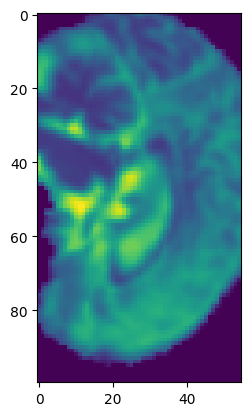

In [12]:
plt.imshow(images[355,:,:,2])

In [13]:
def split_2D(images):
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=1)
    return x_train, y_train, x_test, y_test



def split_3D():
    X_train, x_test, Y_train, y_test = train_test_split(images[:,:,:,53:56], labels, test_size=0.2, random_state=0)
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)
    return x_train, y_train, x_val, y_val, x_test, y_test


In [14]:
x_train, y_train, x_test, y_test = split_2D(images)


size = (224, 224)
x_train = tf.image.resize(x_train, size)
x_test = tf.image.resize(x_test, size)



print(x_train.shape)
print(y_test)

2023-03-12 21:03:30.024158: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 61380000 exceeds 10% of free system memory.
2023-03-12 21:03:30.059402: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 279982080 exceeds 10% of free system memory.


(465, 224, 224, 3)
[0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0
 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1
 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0]


2023-03-12 21:03:30.358787: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 70447104 exceeds 10% of free system memory.


In [15]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2


shape=(224, 224, 3)

## Loading VGG16 model
base_model = MobileNetV2(weights="imagenet", classes=2, input_shape=shape,include_top=False)
base_model.trainable = False ## Not trainable weights

## Preprocessing input
train_ds = preprocess_input(x_train) 
test_ds = preprocess_input(x_test)



2023-03-12 21:03:35.791854: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 279982080 exceeds 10% of free system memory.
2023-03-12 21:03:36.010391: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 279982080 exceeds 10% of free system memory.


In [15]:
def make_3D_CNN(shape=(110, 110, 3)):
  model = Sequential([
      
      Conv3D(2, (11,11,1), padding='valid', input_shape=shape),
      BatchNormalization(),
      Activation('relu'),

      AveragePooling3D((2,2,1), strides=2),
      #Dropout(0.4),

      Conv3D(4, (11,11,1), padding='valid'),
      BatchNormalization(),
      Activation('relu'),

      AveragePooling3D((2,2,1), strides=2),
      #Dropout(0.4),
      
      Conv3D(8, (11,11,1), padding='valid'), MaxPooling2D((1,1), strides=2),
      BatchNormalization(),
      Activation('relu'),
Xception
      AveragePooling3D((2,2,1), strides=2),
      #Dropout(0.4),

      Flatten(),

      Dense(10, activation='relu'),
      Dropout(0.2),
      Dense(1, activation='sigmoid')
     
  ])
  return model

In [41]:
def make_2D_CNN_best(shape=(110, 110, 3)):
  model = Sequential([
      
      Conv2D(2, (5,5), padding='valid', input_shape=shape),
      BatchNormalization(),
      Activation('relu'),
      
      MaxPooling2D((2,2), strides=2),
      #Dropout(0.4),
      
      Conv2D(4, (5,5), padding='valid', input_shape=shape),
      BatchNormalization(),
      Activation('relu'),

      MaxPooling2D((3,3), strides=2),
      #Dropout(0.4),110
      
      Conv2D(8, (5,5), padding='valid', input_shape=shape),
      BatchNormalization(),
      Activation('relu'),

      MaxPooling2D((4,4), strides=2),
      #Dropout(0.4),
      
      Conv2D(16, (5,5), padding='valid', input_shape=shape),
      BatchNormalization(),
      Activation('relu'),

      MaxPooling2D((5,5), strides=2),
      #Dropout(0.4),

      Flatten(),

      Dense(20, activation='relu'),
      #Dropout(0.1),
      Dense(1, activation='sigmoid')
     
  ])
  return model

In [18]:
def make_2D_CNN():
  model = Sequential([
    
    
      base_model,
      
      

      Flatten(),

      Dropout(0.40),   

      Dense(20, activation='relu'),

      Dropout(0.6),
      Dense(1, activation='softmax')

      
  ])
  return model

In [19]:
model = make_2D_CNN()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dropout_2 (Dropout)         (None, 62720)             0         
                                                                 
 dense_2 (Dense)             (None, 20)                1254420   
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                      

In [20]:
model.compile(optimizer=SGD(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
reduce_on_plateau = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=10,
    verbose=0,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0)

early_stopping = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=10)

In [22]:

epochs= 100
batch_size = 50
classweights={0: 0.49,1: 0.51}
history = model.fit(train_ds, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    steps_per_epoch = round(len(train_ds)/batch_size),
                    verbose=1,
                    validation_split=0.2,
                    callbacks=[reduce_on_plateau, early_stopping],class_weight=classweights)

Epoch 1/100
9/9 [==============================] - 11s 957ms/step - loss: 0.4016 - accuracy: 0.4621 - val_loss: 0.6931 - val_accuracy: 0.6022 - lr: 0.0010
Epoch 2/100
9/9 [==============================] - 9s 1s/step - loss: 0.3524 - accuracy: 0.4668 - val_loss: 0.6931 - val_accuracy: 0.6022 - lr: 0.0010
Epoch 3/100
9/9 [==============================] - 9s 1s/step - loss: 0.3464 - accuracy: 0.4526 - val_loss: 0.6931 - val_accuracy: 0.6022 - lr: 0.0010
Epoch 4/100
9/9 [==============================] - 12s 1s/step - loss: 0.3479 - accuracy: 0.4550 - val_loss: 0.6932 - val_accuracy: 0.6022 - lr: 0.0010
Epoch 5/100
9/9 [==============================] - 13s 1s/step - loss: 0.3457 - accuracy: 0.4526 - val_loss: 0.6932 - val_accuracy: 0.6022 - lr: 0.0010
Epoch 6/100
3/9 [=========>....................] - ETA: 5s - loss: 0.3521 - accuracy: 0.4426

: 

: 

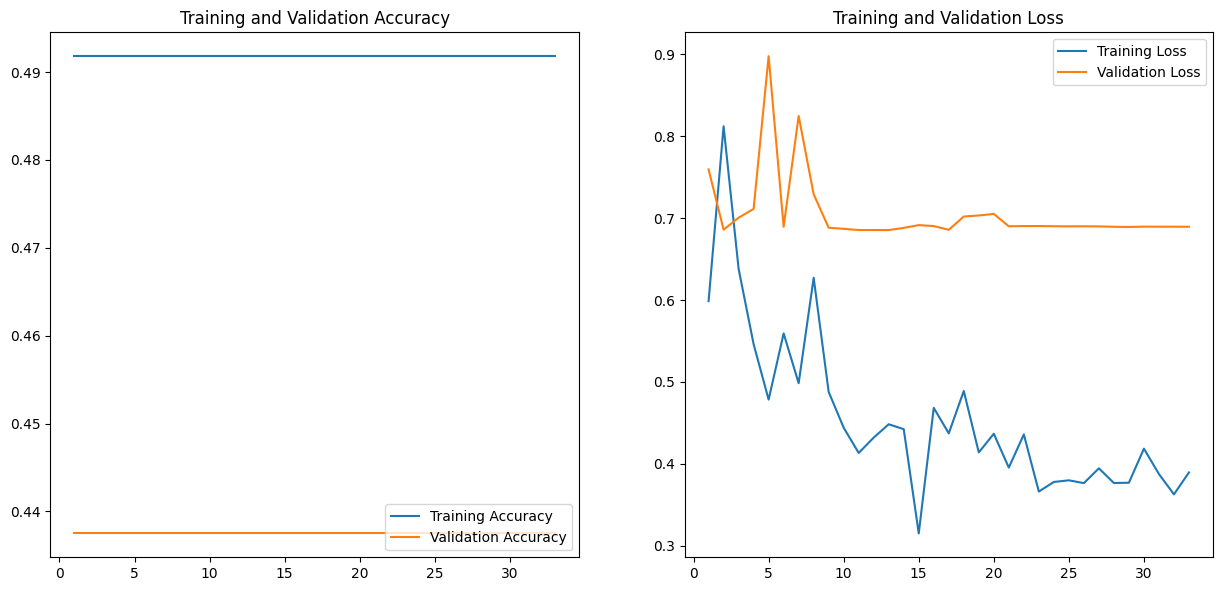

In [83]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc)+1)
#Train and validation accuracy 
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
#Train and validation loss 
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [84]:
_, val_acc = model.evaluate(x_val, y_val, verbose=0)
print('Validation accuracy: %.3f' % (val_acc))

preds = model.predict(x_val, verbose=1)
#Compute Receiver operating characteristic (ROC)
fpr, tpr, _ = roc_curve(y_val, preds)
roc_auc = auc(fpr, tpr)
print('AUC = %.3f'% (roc_auc))

#Plot of a ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Accuracy ROC')
plt.legend(loc="lower right")
plt.show()

NameError: name 'x_val' is not defined

1/1 [==============================] - 0s 88ms/step - loss: 0.7009 - accuracy: 0.5000

Test accuracy: 0.500
1/1 [==============================] - 1s 722ms/step
AUC = 0.500


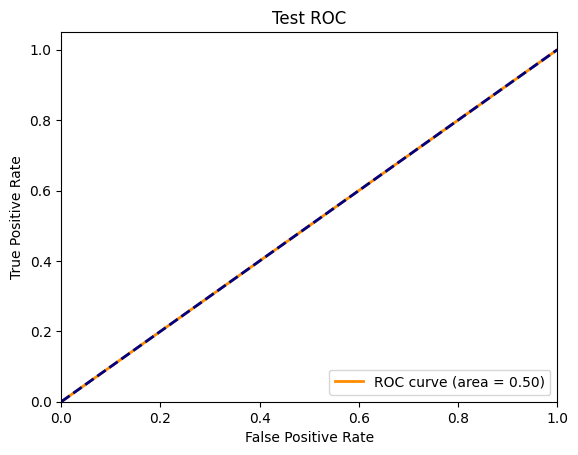

In [85]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy: %.3f' % (test_acc))

preds_test = model.predict(x_test, verbose=1)
fpr, tpr, _ = roc_curve(y_test, preds_test)
roc_auc = auc(fpr, tpr)
print('AUC = %.3f'% (roc_auc))

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC')
plt.legend(loc="lower right")
plt.show()